<a href="https://colab.research.google.com/github/shashankvankadari/DSCI441_Repository/blob/main/DSCI441_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_Efficiency.csv to Sleep_Efficiency.csv


In [6]:
df = pd.read_csv('Sleep_Efficiency.csv')


In [7]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


In [8]:
df = df.drop('ID',axis=1)

In [9]:
#Replace categorical data with zero and ones
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df['Gender'] =df['Gender'].map({'Male':1,'Female':0})

#Convert bed time and wakeup time to suitable timestamp format
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Bedtime'] = df['Bedtime'].apply(lambda x: int(x.timestamp()))
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: int(x.timestamp()))

In [10]:
#Handling null values
print(df.isnull().sum())

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64


There are null values in the dataset. Instead of removing the 60 data points, I did missing value imputation by replacing null values with mean / median of the column

In [11]:
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [12]:
#Missing values are filled 
print(df.isnull().sum())

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [13]:
#Check the data frame statistics
df.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,4.520000e+02,4.520000e+02,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,1.626135e+09,1.626121e+09,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,0.356195,1.791480
std,13.172250,0.500534,8.957783e+06,8.955555e+06,0.866625,0.135237,3.972466,15.561713,15.150774,1.326338,29.353745,1.613923,0.479404,1.418603
min,9.000000,0.000000,1.609634e+09,1.609663e+09,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.618362e+09,1.618387e+09,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.626824e+09,1.626797e+09,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,23.653396,0.000000,0.000000,2.000000
75%,52.000000,1.000000,1.633930e+09,1.633932e+09,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,1.640984e+09,1.640932e+09,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,1.000000,5.000000


In [14]:
#Checking for duplicate values
print("Duplicate count = ", df.duplicated().sum())

Duplicate count =  0


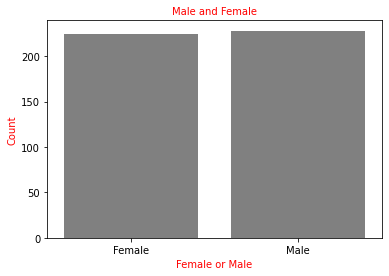

In [ ]:
sns.countplot(data=df,x="Gender", color="grey")
plt.xlabel("Female or Male", color="red",fontsize=10)
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()

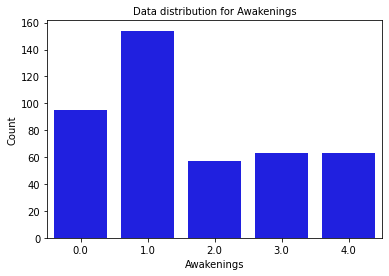

In [ ]:
sns.countplot(data=df,x="Awakenings", color="blue")
plt.xlabel("Awakenings", color="black",fontsize=10)
plt.ylabel("Count", color="black",fontsize=10)
plt.title("Data distribution for Awakenings", color="black",fontsize=10)
plt.show()

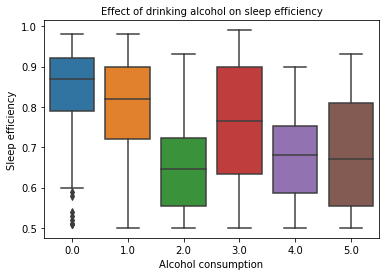

In [ ]:
sns.boxplot(data=df,x="Alcohol consumption",y="Sleep efficiency")
plt.title("Effect of drinking alcohol on sleep efficiency", color="black",fontsize=10)
plt.show()